Dear students in INF250.

The exam consists of 3 exercises where you will carry out some image processing and analysis of different images. The images can be downloaded from Canvas in the directory Exam2022. Write a report in pdf including a description of your techniques and results for each exercise. A script or a pseudo code should also be included in the pdf. You can generate the report with Latex, Word, Jupyter notebook or something else.  It can be in English or Norwegian.

Remember that you have access to example scripts from the lectures that will help you in all these tasks. Remember also that there is not always just one solution to the tasks. Try to be creative and use the techniques you have learned.

 

The grading of the exam will be from A to F.  You will get points for each question, a total of 100 points.

 

Good luck! 

# Exercise 1 (25p)

 

You will work on the image soccerteam.jpg  shown in Figure 1.

The photographer was very excited to capture an historical event and unfortunately the image turned out a bit blurry.

 

1. Try to sharpen the image to make it more presentable. Your rapport must include:
    - Description of the technique(s) you use (4p)
    - Demonstration of the result (5p)
    - Python script or pseudocode for ImageJ (4p)



2. In Figure2 there are two images resulting from applying a Canny filter. One is applied on the original image and one on the sharpened image.
    - What is a Canny filter? Describe with a few lines. (3p)
    - Which of the images shows Canny applied on the sharpened image and which is on the original image? (2p)
    - Run the Canny filter on your original image and on your sharpened image from Exercise 1a) with 3 different values of sigma. What do you observe? (4p)
    - Include the images you make and your script/pseudocode. (3p)

# Task1: Sharpening the image
#USM SIgma=10 best

In [1]:
# importing all the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import io # for image opening and saving

from skimage.util import img_as_ubyte #changed the image version before saving the image
from skimage.color import rgb2gray

# for edge detection filters
from skimage import filters #sobel,  prewitt & laplace
from skimage import feature# canny

#For sharpending filters
from skimage.filters import median, gaussian, laplace

In [2]:
#Getting the image
filename = 'soccerteam.jpg'
RGB_image = io.imread(filename)
gray_image = rgb2gray(RGB_image)

In [3]:
def sharpen(image, sharpmask):
    """Performs an image sharpening using Laplace filter or unsharpen mask (USM)
    1 = Laplace
    2 = USM
    3 = high pass
    
    Returns: sharpened image
    """
    amount = 3 # parameter--hypertuning, weight of sharpening
    if sharpmask == 1:
        filtered = laplace(image) 
        sharpened = image - amount*filtered
    elif sharpmask == 2:  #USM with sigma 10
        gaussasian_blur = gaussian(image, sigma=10) 
        sharpened = image + amount*(image - gaussasian_blur) 
    elif sharpmask == 3:  # High pass with sigma 10
        gaussasian_blur = gaussian(image, sigma=10) 
        sharpened = image - gaussasian_blur  
    elif sharpmask == 4:  #USM with sigma 5
        gaussasian_blur = gaussian(image, sigma=5) 
        sharpened = image + amount*(image - gaussasian_blur) 
    elif sharpmask == 5:  # High pass with sigma 5
        gaussasian_blur = gaussian(image, sigma=5) 
        sharpened = image - gaussasian_blur  
    elif sharpmask == 6:  #USM with sigma 15
        gaussasian_blur = gaussian(image, sigma=15) 
        sharpened = image + amount*(image - gaussasian_blur) 
    elif sharpmask == 7:  # High pass with sigma 15
        gaussasian_blur = gaussian(image, sigma=15) 
        sharpened = image - gaussasian_blur  
    else:
        print("wrong mask")
    return sharpened

In [4]:
def show_plot_sharp():

    fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 12))
    fig.suptitle("Sharpening filters on the gray image", fontsize = 13)  

    ax[0, 0].imshow(gray_image, cmap ='gray')
    ax[0, 0].set_title('original', fontsize = 10)
    
    ax[0, 1].imshow(laplace_sharp, cmap ='gray')
    ax[0, 1].set_title(r'laplace_sharp', fontsize = 10)
    
    ax[0, 2].imshow(gray_image, cmap ='gray')
    ax[0, 2].set_title('original', fontsize = 10)
    

    
    ax[1, 0].imshow(usm_sharp, cmap ='gray')
    ax[1, 0].set_title(r'usm_sharp sigma 5', fontsize = 10)
    
    ax[1, 1].imshow(usm_sharp2, cmap ='gray')
    ax[1, 1].set_title(r'usm_sharp sigma 10', fontsize = 10)

    ax[1, 2].imshow(usm_sharp3, cmap ='gray')
    ax[1, 2].set_title(r'usm_sharp sigma 15', fontsize = 10)    
    
    
    
    ax[2,0].imshow(high_pass_sharp, cmap ='gray')
    ax[2,0].set_title(r'high_pass_sharp sigma 5', fontsize = 10)
    
    ax[2,1].imshow(high_pass_sharp2, cmap ='gray')
    ax[2,1].set_title(r'high_pass_sharp sigma 10', fontsize = 10)
 
    ax[2,2].imshow(high_pass_sharp3, cmap ='gray')
    ax[2,2].set_title(r'high_pass_sharp sigma 15', fontsize = 10)
    
    for row in ax:
        for col in row:
            col.axis('off')

    fig.tight_layout()
    plt.show()

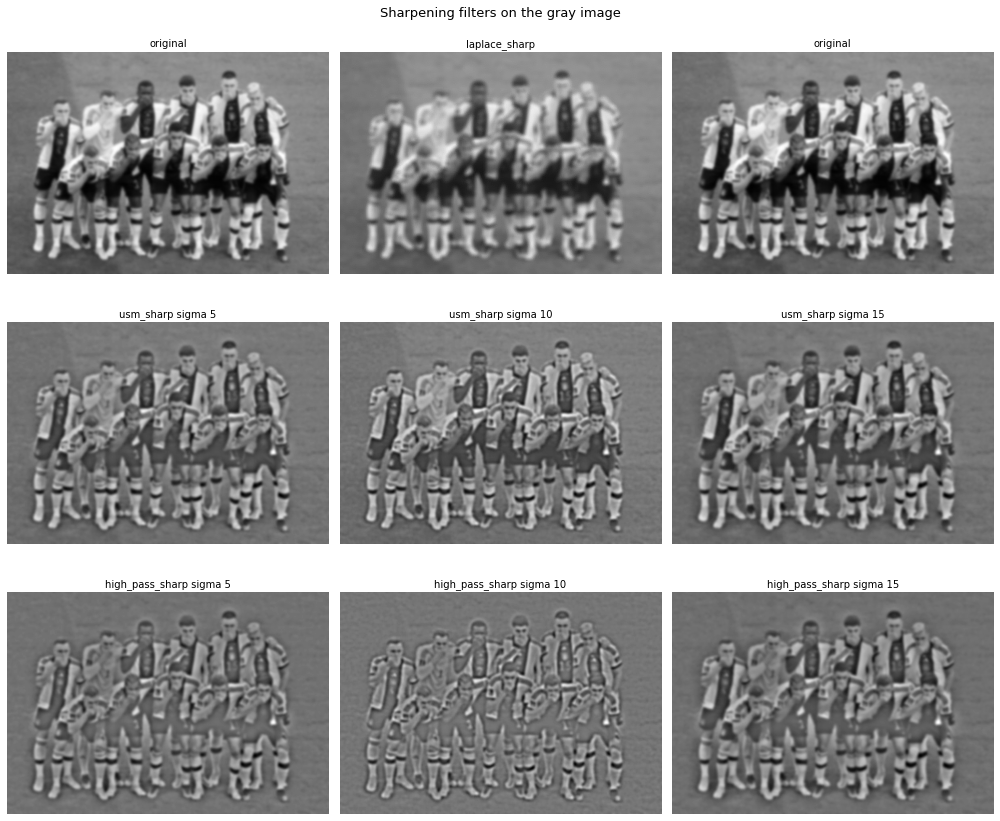

In [5]:
# calling all the sharpening methods
laplace_sharp = sharpen(gray_image[:,:], 1)

usm_sharp = sharpen(gray_image[:,:], 2)
high_pass_sharp = sharpen(gray_image[:,:], 3)

usm_sharp2 = sharpen(gray_image[:,:], 4)
high_pass_sharp2 = sharpen(gray_image[:,:], 5)

usm_sharp3 = sharpen(gray_image[:,:], 6)
high_pass_sharp3 = sharpen(gray_image[:,:], 7)

#Viewing the images
show_plot_sharp() 


2. In Figure2 there are two images resulting from applying a Canny filter. One is applied on the original image and one on the sharpened image.
    - What is a Canny filter? Describe with a few lines. (3p)
    - Which of the images shows Canny applied on the sharpened image and which is on the original image? (2p)
    - Run the Canny filter on your original image and on your sharpened image from Exercise 1a) with 3 different values of sigma. What do you observe? (4p)
    - Include the images you make and your script/pseudocode. (3p)
    
# Task2: Canny filter on the sharpened and unsharpened image 
#Right on sharpend (messy), left on original gray

In [6]:
#Canny filter on original gray image
canny_filtered1 = feature.canny(gray_image, sigma = 3)  
canny_filtered2 = feature.canny(gray_image, sigma = 5)  
canny_filtered3 = feature.canny(gray_image, sigma = 7)  

#Canny filter on sharpened gray image: usm_sharp2
canny_filtered_sharped1 = feature.canny(usm_sharp2, sigma = 3)  
canny_filtered_sharped2 = feature.canny(usm_sharp2, sigma = 5)  
canny_filtered_sharped3 = feature.canny(usm_sharp2, sigma = 7)  

In [7]:
def show_plot_canny():

    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))
    fig.suptitle("Canny filter on the original gray image and sharpened gray image", fontsize = 13)  

    ax[0, 0].imshow(canny_filtered1, cmap ='gray')
    ax[0, 0].set_title('Original image with sigma=3', fontsize = 10)
    
    ax[0, 1].imshow(canny_filtered2, cmap ='gray')
    ax[0, 1].set_title('Original image with sigma=5', fontsize = 10)
    
    ax[0, 2].imshow(canny_filtered3, cmap ='gray')
    ax[0, 2].set_title('Original image with sigma=7', fontsize = 10)
    

    
    ax[1, 0].imshow(canny_filtered_sharped1, cmap ='gray')
    ax[1, 0].set_title('Sharpened image with sigma=3', fontsize = 10)
    
    ax[1, 1].imshow(canny_filtered_sharped2, cmap ='gray')
    ax[1, 1].set_title('Sharpened image with sigma=5', fontsize = 10)

    ax[1, 2].imshow(canny_filtered_sharped3, cmap ='gray')
    ax[1, 2].set_title('Sharpened image with sigma=7', fontsize = 10)    
    

    for row in ax:
        for col in row:
            col.axis('off')

    fig.tight_layout()
    plt.show()

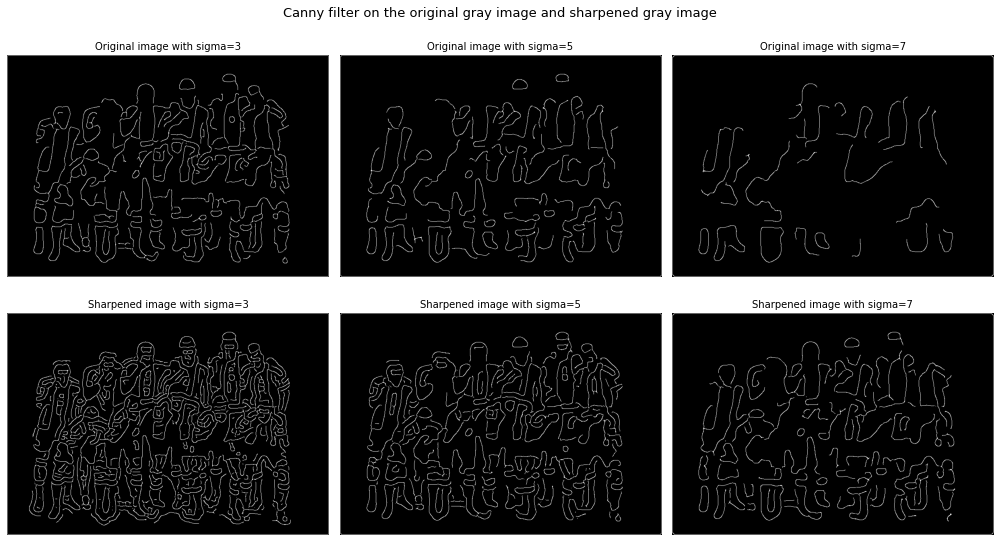

In [8]:
show_plot_canny()

# Exercise 2. (25p)

 In this exercise you will work on the image coffeebeans.jpeg as showed in Figure 3.

There are shadows around each coffee bean and clove. Experiment with some techniques you have learned in the course and **try to eliminate the shadows** as much as you can.

1. Describe the techniques you use and explain how they work. Show images with results and intermediate results. (5p)
2. Create a mask of the beans and cloves and compute images of the beans and the cloves like showed in Figure 4. One with shadows included and one without. (5p)

3. We want to count only the coffee beans. Try to make a selection so that you only count the coffee beans and not the cloves. (5p)
4. Create a list with the center x,y positions of all the coffee beans in the image. (5p)
5. Can you compute the size of the coffee beans? Explain how and/or why it is challenging. (5p)


crop-8bit
adjust-auto threshold-otsu
edit-invert
process-binary-fill-holes
process-binary-watershed

#Mask
image → Duplicate\
image → type → 8 bit\
Process → enhance contrast\
image → adjust → auto-thershold-triangle\
Edit  →  invert (Fill holes work only on white-objects)\
Process → binary → fill holes\
Edit  →  invert (Object black-0, background-255)\

Processs → Image calculator→  add :(1st image-Original, 2nd image- the mask)

# Exercise 3 (50p)

 

The file nmbu.py is a hyperspectral airborne image of the TF-buildings and Aud Max. An RGB representation is shown in Fig.5.

1.  Load the image npy and the header file nmbu.hdr into Python and display the image by selecting three wavebands. Write which wavebands you display and which wavelength they correspond to. (5p)
 

2. Make a plot with the spectrum as a function of wavelength, from the following materials: (5p)
    - Grass

    - Asphalt

    - Black roof

    - Red roof

    - Solar panels (see where I have marked them on the image)

    - Water (see where I have marked them on the image)
    
    
3. Compute an NDVI (Normalized Difference Vegetation Index) image from the dataset and display it. (5p)
4. Compute a Principal Component Analysis of the data. (15p)
    - Display the 5 first score images with the corresponding loadings. What do you observe? What can you tell from these figures about the data?
    - Display the plot of the Eigenvalues. Why do you think there is such a break in the curve at component no 2?
    - How much explained variance is included in the two first components?
    - How many components do you need to cover 99.9% of the explained variance?
    
5. Compute a Gaussian Maximum Likelihood Classification to classify 4-6 classes. Run the classification on the complete hyperspectral image and on the stack of the 8 first principal component score images. (10p)
    - Show the ground truth image with your classes.
    - Show the results on both the full hyperspectral image and on the stack om 8 score images.
    - Comment on your results.
6. Apply an edge detecting filter on the class of vegetation and overlay the ndvi-image you computed earlier. This will outline the vegetation areas in the image as shown in Fig. 6. (10p)

--------------------------------------------------------------------------------------------

# Solution starts here
--------------------------------------------------------------------------------------------

In [9]:
# Importing all the necessary modules
from spectral import *
import numpy as np
import matplotlib.pyplot as plt
import skimage
import math

# for edge detection filters
from skimage import filters #sobel,  prewitt & laplace
from skimage import feature# canny

1.  Load the image npy and the header file nmbu.hdr into Python and display the image by selecting three wavebands. Write which wavebands you display and which wavelength they correspond to. (5p)
 
 
 # Task1: Loading the image & getting the band numbers
 
Loaded the image using numpy.load(). 

The wavelength range for the RGB colors are: (Source: https://www.en.silicann.com/blog/post/wavelength-color/)
- Entire Red spectrum approx. 650–750 nm 
- Entire Green spectrum approx. 490–575 nm 
- Entire Blue spectrum approx. 420–490 nm 

Since no wavelengths for the RGB was given in the question. I took the middle value of each spectrum and calculated the band numbers using those. 
- Red: Chosen the middle of the range 650nm 
- Green: Chosen the middle of the range 540nm 
- Blue: Chosen the middle of the range 450nm 

The infrared radiation(NIR) starts at wavelengths greater than 780nm. So, chosen 800nm for NIR.

The function find_bands() takes a list of all the 186 wavelengths and a dictionary of required wavelengths which has band name as keys and wavelength as values. It finds the band numbers nearest to the given required wavelengths. Then returns a dictionary which has color names as keys and band number as values.

Using my chosen wavelengths I got the following bands:\
{'blue': 14, 'green': 42, 'red': 77, 'NIR': 124}

In [10]:
# Function for finding the required bands
def find_bands(all_wavelengths, required_wavelengths):
    """
    Parameters:
        all_wavelengths: list of all 186 wavelengths available
        required_wavelengths:  a dictionary which has band names as keys and wavelength as values.
    Return:
        required_bands: a dictionary which has band names as keys and band number as values
    """
    required_bands = {}
    
    for wavelength in required_wavelengths.keys():
            min_distance = None
            min_wave_val = None
            band = None
            for index, wave_val in enumerate(all_wavelengths): 
                current_distance = abs(wavelength - wave_val)
                if min_distance == None:
                    min_distance = current_distance
                    min_wave_val = wave_val
                    band = index+1
                elif current_distance> min_distance:
                    break
                elif current_distance< min_distance:
                    min_distance = current_distance
                    min_wave_val = wave_val
                    band = index  

            band_name = required_wavelengths[wavelength]
            required_bands[band_name]=band        
    return required_bands

In [11]:
#Loading the image
hyperim = np.load("nmbu.npy")

# Calling the function to get required wavelength bands
wavelength = envi.read_envi_header('nmbu.hdr')['wavelength']
default_bands = envi.read_envi_header('nmbu.hdr')['default_bands']
all_wavelengths = [float(i) for i in wavelength]
# required_wavelengths = {440:"blue", 535:'green', 645:'red', 800:'NIR'}#From assignmnet
required_wavelengths = {450:"blue", 540:'green', 650:'red', 800:'NIR'}# New set by me
required_bands = find_bands(all_wavelengths, required_wavelengths)
print("Wavelength available:", len(wavelength))
print("Required_bands", required_bands)
# print("Default_bands", default_bands)

Wavelength available: 186
Required_bands {'blue': 14, 'green': 42, 'red': 77, 'NIR': 124}


In [12]:
#Organising the RGB bands in list format
print("required_bands", required_bands)   
RGB_bands = [required_bands['red'],required_bands['green'],required_bands['blue']]
print("RGB_bands", RGB_bands)
NIR_band = required_bands['NIR']
print("NIR_band", NIR_band)
red_band = required_bands['red']
print("red_band", red_band)

required_bands {'blue': 14, 'green': 42, 'red': 77, 'NIR': 124}
RGB_bands [77, 42, 14]
NIR_band 124
red_band 77


#### Diplaying RGB image with only 1 band for each color

With the detected band numbers for red, green and blue, an RGB image was comptuded by adding those band numbers according to the respective color channels.

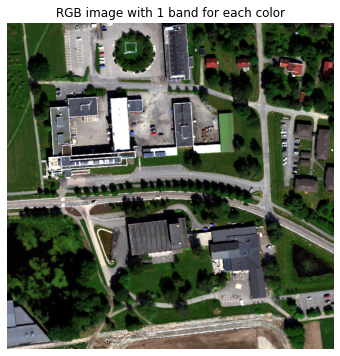

In [13]:
imshow(hyperim, bands = RGB_bands, stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)), figsize=(10,6))
plt.title("RGB image with 1 band for each color")
plt.axis('off')
plt.show()

#### Displaying RGB image with an average of 10 bands for each color
Since each color might belong to a range of bands, an average of the nearest 10 bands have been taken for each color.

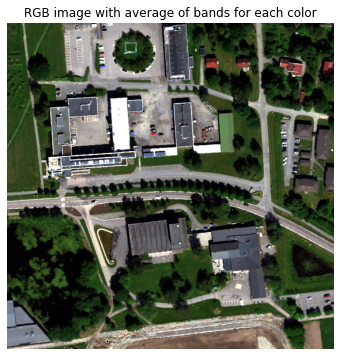

In [14]:
RGB_average_hyperim = hyperim[:, :, :]

blue_avg = RGB_average_hyperim [:, :, required_bands['blue']-5:required_bands['blue']+5 +1 ].mean(axis=2)
green_avg = RGB_average_hyperim [:, :, required_bands['green']-5:required_bands['green']+5 +1 ].mean(axis=2)
red_avg = RGB_average_hyperim [:, :, required_bands['red']-5:required_bands['red']+5 +1 ].mean(axis=2)

shape = RGB_average_hyperim.shape
RGB_avg = np.zeros([shape[0], shape[1], 3])
RGB_avg[:, :, 0] = red_avg
RGB_avg[:, :, 1] = green_avg
RGB_avg[:, :, 2] = blue_avg

imshow(RGB_avg, stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)), figsize=(10,6))
plt.title("RGB image with average of bands for each color")
plt.axis('off')
plt.show()

#### Comment on the RGB image with 1 band and the RGB image with the average of 10 bands.
Each of the color belongs to multiple bands, so instead of taking just 1 band, if we take a range of bands(10 bands) belonging to that color, the image quality is slightly improved.

2. Make a plot with the spectrum as a function of wavelength, from the following materials: (5p)
    - 1. Grass

    - 2. Asphalt

    - 3. Black roof

    - 4. Red roof

    - 5. Solar panels (see where I have marked them on the image)

    - 6. Water (see where I have marked them on the image)
    
    
 ## Task2: Spectra image with the selected pixel points:

Six pixel points corresponding to following materials had been selected from the image and their 
values have been plotted in the spectra image.
- Grass
- Asphalt
- Black roof
- Red roof
- Solar panels
- Water

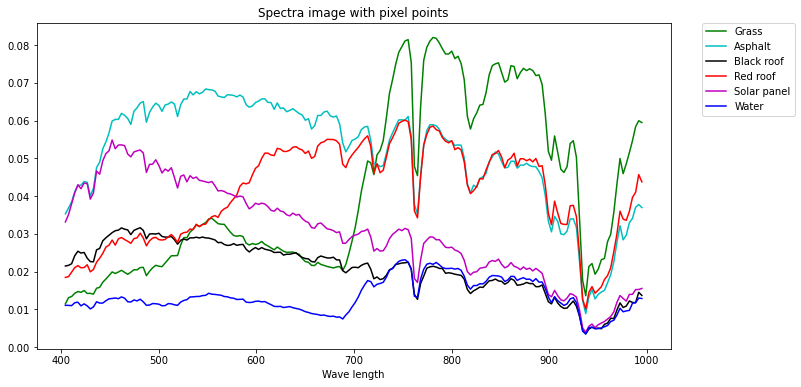

In [15]:
#spectrum of 1 pixel for each material/region
grass = np.array(hyperim[402, 40, :].reshape(-1,1)) # Grass
asphalt = np.array(hyperim[253, 769, :].reshape(-1,1))#Asphalt 
black_roof = np.array(hyperim[719, 735, :].reshape(-1,1)) # Black roof
red_roof = np.array(hyperim[133, 886, :].reshape(-1,1)) # Red roof
solar_panel = np.array(hyperim[405, 429, :].reshape(-1,1)) # Solar panel
water = np.array(hyperim[713, 896, :].reshape(-1,1)) # Water

#Diplaying the spectra
fig, ax_dict = plt.subplot_mosaic([ ['bottom', 'BLANK']], empty_sentinel="BLANK", figsize = (25, 6))

ax_dict['bottom'].plot(all_wavelengths,  grass, color = 'g', label='Grass')
ax_dict['bottom'].plot(all_wavelengths, asphalt, color = 'c', label='Asphalt')
ax_dict['bottom'].plot(all_wavelengths, black_roof, color = 'k',label='Black roof')
ax_dict['bottom'].plot(all_wavelengths,  red_roof, color = 'r', label='Red roof')
ax_dict['bottom'].plot(all_wavelengths, solar_panel, color = 'm', label='Solar panel')
ax_dict['bottom'].plot(all_wavelengths, water , color = 'b',label='Water')

# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Spectra image with pixel points")
plt.xlabel("Wave length")
plt.show()

#### Comment on the Spectra image
- We know the Red color has the wave length from 620 to 720 nm, and NIR has wavelength from 800 to 2,500 nm. Usually anything that has a higher presense in the wavelength starting after red(720nm) and before NIR(800nm) are considered vegetation.

- From the spectrum image, we can see that 
  - Grass(vegatation) has a spike from approximately 680nm which continued till approximately 930nm, proving the presense of chlorophyll in that range of wavelength. (vegetation spectrum). Small peak in the Green spectrum zone (490 to 575 nm), justifies the vegetation reflecting green lights.
  - The water is supposed to be blue. But due to the presense of vegetation(water hyacinth/plants) present in the water, it has the curve similar to the vegetation curve. With a negligible peak at the green spectrum zone.
  - The dark roof have very flat spectrum curve, without any spikes in the vegetation considered wavelength zone. 
  - The Red-roof-top reflected red color which justifies the high peak value in the red spectrum (approx. 650–750 nm)
  - The asphalt does not have any specific spectrum
  - From 700 to 950nm wavelength, all the spectrums have a similar shape which varries in height due to the intensity variation 
  


## Mean spectrum of 20x20 pixels for each material/region
Three 20x20 pixel area corresponding to the vegetation, asphalt and roof had been selected from the image and their values have been plotted in the spectra image.

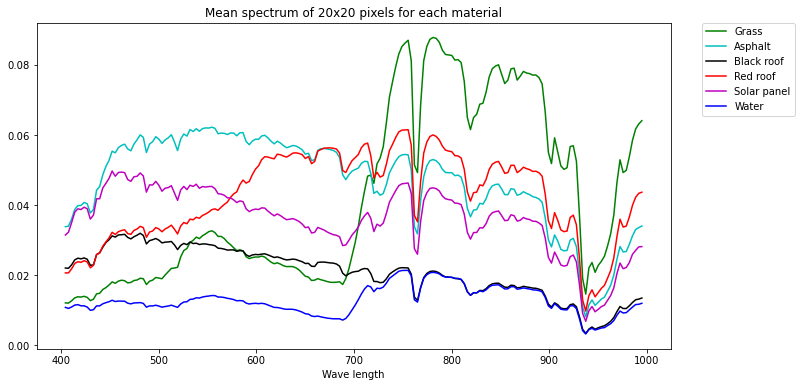

In [16]:
#Mean spectrum of 20x20 pixels for each material/region

grass1 = hyperim[402:422, 40:60, :].mean(axis = 0) # Grass
grass = grass1.mean(axis=0).reshape(-1,1) # grass

asphalt1 = hyperim[250:270, 770:790, :].mean(axis = 0)#Asphalt 
asphalt = asphalt1.mean(axis=0).reshape(-1,1) # grass

black_roof1 = hyperim[720:740, 735:755, :].mean(axis = 0) # Black roof
black_roof = black_roof1.mean(axis=0).reshape(-1,1) # grass

red_roof1 = hyperim[133:153, 886:906, :].mean(axis = 0) # Red roof
red_roof = red_roof1.mean(axis=0).reshape(-1,1) # grass

solar_panel1 = hyperim[405:415, 428:438, :].mean(axis = 0) # Solar panel
solar_panel = solar_panel1.mean(axis=0).reshape(-1,1) # grass

water1 = hyperim[715:735, 900:920, :].mean(axis = 0) # Water
water = water1.mean(axis=0).reshape(-1,1) # grass

#Displaying the image
fig, ax_dict = plt.subplot_mosaic([ ['bottom', 'BLANK']], empty_sentinel="BLANK", figsize = (25, 6))

ax_dict['bottom'].plot(all_wavelengths,  grass, color = 'g', label='Grass')
ax_dict['bottom'].plot(all_wavelengths, asphalt, color = 'c', label='Asphalt')
ax_dict['bottom'].plot(all_wavelengths, black_roof, color = 'k',label='Black roof')
ax_dict['bottom'].plot(all_wavelengths,  red_roof, color = 'r', label='Red roof')
ax_dict['bottom'].plot(all_wavelengths, solar_panel, color = 'm', label='Solar panel')
ax_dict['bottom'].plot(all_wavelengths, water , color = 'b',label='Water')

# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Mean spectrum of 20x20 pixels for each material")
plt.xlabel("Wave length")
plt.show()

#### Comment on the Spectra image with points vs  Mean spectrum of 20x20 pixels for each region
*Spectra image with points* and *Spectra image with 20x20 pixels* does not have any visible drastic changes, rather they look same. It implies the range of pixels belonged to almost similar colors/materials.

3. Compute an NDVI (Normalized Difference Vegetation Index) image from the dataset and display it. (5p)

# Task3: NDVI calculation & NDVI Image display

##### Facts about the NDVI valus:
- High values (0.66 to 1) represent very healthy plants
- Moderate values (0.33 to 0.66 ) represent moderately healthy plants
- Very low values of NDVI (0.1 and below) correspond to barren areas of rock, sand, or snow. Negative values are often water.
- Source link: https://earthobservatory.nasa.gov/features/MeasuringVegetation

##### NDVI index can be calculated in 2 ways:
- Method1: Manually using the red band and NIR band obtained from the function
- Method2: Using the built-in python function

#### NDVI calculating using the equation/formula

In [17]:
# NDVI calculating using the equation/formula
np.seterr(invalid='ignore') #ignoring the Nan values
ndvi_image_manual = (hyperim[:,:,NIR_band]-hyperim[:,:,red_band])/(hyperim[:,:,NIR_band]+hyperim[:,:,red_band])

#### NDVI calculating using the python function

In [18]:
# NDVI calculating using the python function 
np.seterr(invalid='ignore') #ignoring the Nan values
ndvi_image_python = ndvi(hyperim[:,:],red_band, NIR_band)

####  NDVI image display

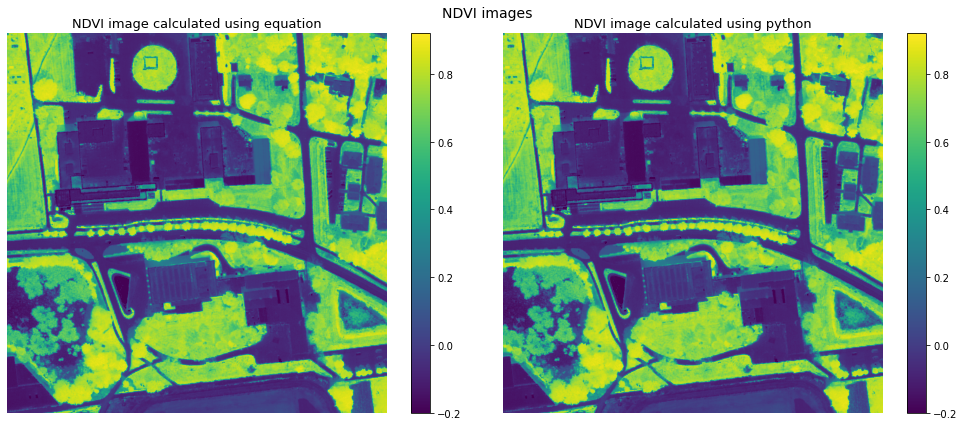

In [19]:
# Plotting the NVDI images
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
fig.suptitle("NDVI images", fontsize = 14)

# NDVI image calculated using equation
img1 = ax[0].imshow(ndvi_image_manual, vmin = -0.2, vmax = 0.92) 
ax[0].set_title("NDVI image calculated using equation", fontsize = 13)
plt.colorbar(img1, ax=ax[0])

# NDVI image calculated using python
img2 = ax[1].imshow(ndvi_image_python, vmin = -0.2, vmax = 0.92) 
ax[1].set_title("NDVI image calculated using python", fontsize = 13)
plt.colorbar(img2, ax=ax[1])

for a in ax:
    a.axis('off')    
    
fig.tight_layout()
plt.show()

4. Compute a Principal Component Analysis of the data. (15p)
    - Display the 5 first score images with the corresponding loadings. What do you observe? What can you tell from these figures about the data?
    - Display the plot of the Eigenvalues. Why do you think there is such a break in the curve at component no 2?
    - How much explained variance is included in the two first components?
    - How many components do you need to cover 99.9% of the explained variance?
    
 
 # Task4: PCA: Score images, Loading plots, PCA plot, PCA image

### PCA image calcualtion using 31 PCs (99.9% variance explained)

In [20]:
pc = principal_components(hyperim)
pc_0999 = pc.reduce(fraction=0.999)# select the PCs with 99.9% variance-
img_31PCs = pc_0999.transform(hyperim) # then transforming that PCs with 99.9% to image
print("Number of PC's selected:", img_31PCs.shape[2])

Number of PC's selected: 31


## Analysis of the PCA Score Plots and their corresponding Loading Plots images
#### Assuming, PC = Principle Component

In [21]:
# loadings
loadings = pc_0999.eigenvectors 

In [22]:
#Function for displaying the score image and the loading plot for each PC
def display_score_plot_N_loading_plot(pc_no, loadings, image, vmin, vmax):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5)) #(width,height)

    ax[0].imshow(img_31PCs[:,:,pc_no], vmin=vmin, vmax = vmax)
    ax[0].set_title('PC'+str(pc_no)+' score image', fontsize = 13)

    ax[1].plot(all_wavelengths, loadings[:,[pc_no]])
    ax[1].set_title('PC'+str(pc_no)+' loading plot', fontsize = 13)
    ax[1].set_xlabel('Wavelength', fontsize = 13)
    ax[1].set_ylabel('Intensity', fontsize = 13) 
    
    ax[0].axis('off')

fig.tight_layout()
plt.show()

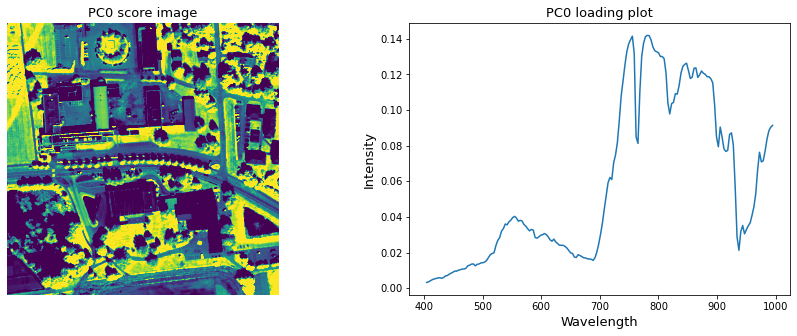

In [23]:
#PC0 score and loading plot generating
display_score_plot_N_loading_plot(pc_no = 0,  loadings = loadings, image = img_31PCs, vmin = -0.2, vmax = 0.3)

### Comment on PC0:
- **Score image**: differentiates 3 groups 
    - black roof tops, dark trees, vegetation in pond (represented in black)
    - grass (represented in yellow)
    - rest (represented in green)
- **Loading plot**: PC0 has identified all the vegetations(both grass and trees). A typical vegetation loading plot can be observed with a peak at the green spectrum justifiying the reflection of green color. 

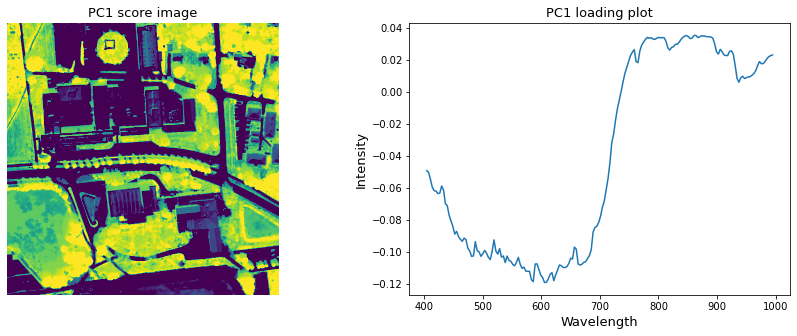

In [24]:
#PC1 score and loading plot generating
display_score_plot_N_loading_plot(pc_no = 1,  loadings = loadings, image = img_31PCs, vmin=-0.09, vmax = 0.2)

### Comment on PC1:
- **Score image**: differentiates 3 groups 
    - vegetation (grass, water based vegetation from the pond) (represented in yelloish green)
    - Gable shaped roofs & few small soil fields (represented in Turquoise)
    - rest (represented in black)
- **Loading plot**:  PC1 has identified all the vegetations(both grass and trees). A typical vegetation loading plot can be observed  

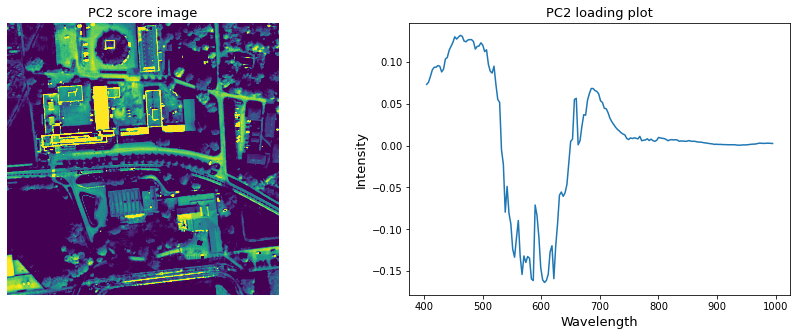

In [25]:
#PC2 score and loading plot generating
display_score_plot_N_loading_plot(pc_no = 2,  loadings = loadings, image = img_31PCs, vmin=-0.007, vmax = 0.03)

### Comment on PC2:
- **Score image**: differentiates 3 groups 
    - white roof tops (represented in yellow)
    - concrete made roof tops and grounds, asphalt roads (represented in green)
    - rest (vegetation & soil grounds) (represented in black)
- **Loading plot**: All the vegetation has been identified in the black color. So, a flipped peak at the green spectrum (490 to 575 nm) justifies the reflection of the green.

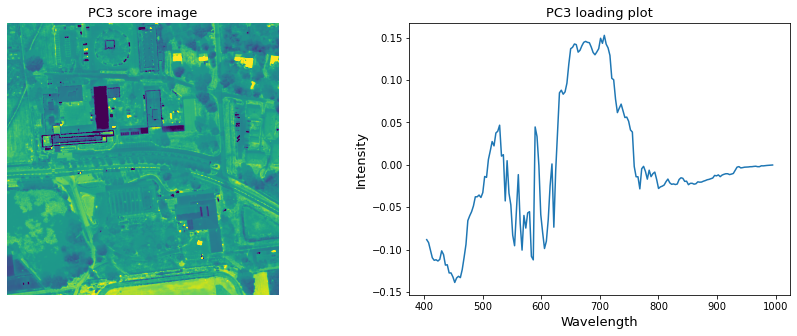

In [26]:
#PC3 score and loading plot generating
display_score_plot_N_loading_plot(pc_no = 3,  loadings = loadings, image = img_31PCs, vmin=-0.06, vmax = 0.05)

### Comment on PC3:
- **Score image**: differentiates 3 groups 
    - white roof tops (represented in black)
    - red roof tops (represented in yellow)
    - rest (represented in green)
- **Loading plot**: Due to the reflectence of red color by the red roof tops, a peak in the red spectrum zone(650–750nm) is noticed.

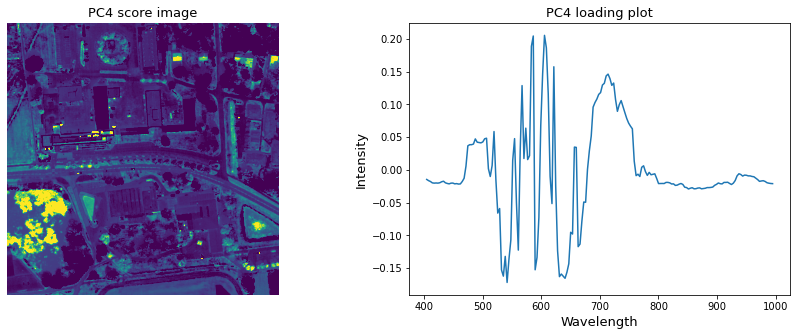

In [27]:
#PC4 score and loading plot generating
display_score_plot_N_loading_plot(pc_no = 4,  loadings = loadings, image = img_31PCs, vmin = -0.003, vmax = 0.02)

### Comment on PC4:
- **Score image**: differentiates 3 groups 
    - green trees, vegetation in the pond, red roof tops (represented in yellow)
    - dark trees, white roof tops (represented in black)
    - rest (represented in green)
- **Loading plot**: The identified vegetation in this zone might have high intensity in green color. The green color reflectence in this loading plot is quite high.

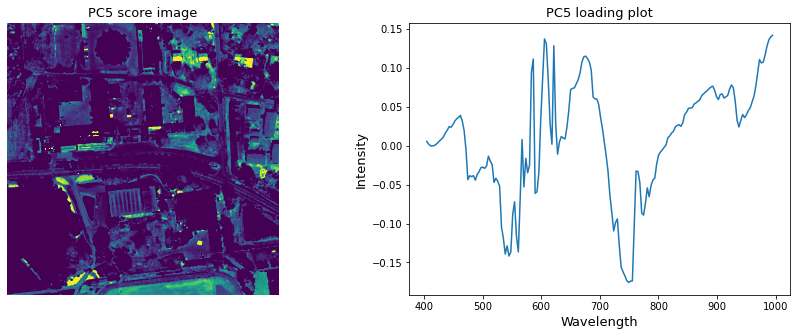

In [28]:
#PC5 score and loading plot generating
display_score_plot_N_loading_plot(pc_no = 5,  loadings = loadings, image = img_31PCs, vmin = -0.0009, vmax = 0.04)

#### Comment on PC5:
- **Score image**: differentiates 3 groups 
    - soil grounds (represented in green)
    - red & white roof tops, soil close to trees (represented in yellow)
    - rest (represented in black)
- **Loading plot**: No distinct features identified

## Plotting the eigen values (PCA plot)

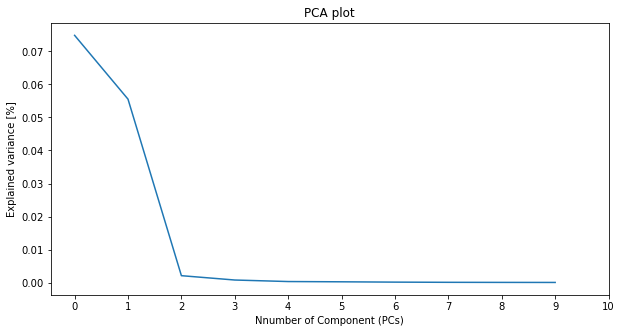

In [29]:
# Generating PCA plot to explain the variance present in the image
plt.figure(figsize=(10,5))
plt.plot(pc.eigenvalues[0:10])
plt.title("PCA plot")
plt.xlabel('Nnumber of Component (PCs)')
plt.ylabel('Explained variance [%]')
plt.xticks(np.arange(0,11,1))
plt.show()

#### Comment on the PCA plot:
- **The break in the curve at component no 2** indicates the amount of components needed to explain the variance. In this case, its thr 1st 3 PCs.
- **1st 2 PCs (PC0 & PC1) explains 95% variance** present in the image [Shown in the code block below]
- **1st 3 PCs (PC0, PC1 & PC3) explains 97% variance** present in the image [Shown in the code block below]
- **99.9% variance explained** by the 1st **31 PCs** present in the image [Shown in the code block below]
- From the PCA plot, we can see that, according to the **"Elbow method"**, only the **1st three PCAs** are enough to explain the variance present in the image. But, there is a possibility that the rest of the PCs might have important informations. So, at first we should take more than 3 PCs to check whether they contain any relevant information.


In [30]:
#Percentage of PCs explained by the variance

#Taking 2 PCs
variance_explained = 0.95
pc_2 = pc.reduce(fraction = variance_explained)# select the PCs with 95.00% variance-
img_2PCs = pc_2 .transform(hyperim) # then transforming that PCs with 95.00% to image
print("Number of PC's selected (PC0 & PC1):", img_2PCs.shape[2])
print("Variance explained by 1st two PCs :", variance_explained*100, "%")
print("===========================================")

#Taking 3 PCs
variance_explained = 0.97
pc_3 = pc.reduce(fraction = variance_explained)# select the PCs with 97.00% variance-
img_3PCs = pc_3 .transform(hyperim) # then transforming that PCs with 97.00% to image
print("Number of PC's selected (PC0, PC1 & PC2):", img_3PCs.shape[2])
print("Variance explained by 1st three PCs:", variance_explained*100, "%")
print("===========================================")

#Taking 31 PCs
variance_explained = 0.999
pc_31 = pc.reduce(fraction = variance_explained)# select the PCs with 99.9% variance-
img_31PCs = pc_31 .transform(hyperim) # then transforming that PCs with 99.9% to image
print("Number of PC's selected:", img_31PCs.shape[2])
print("Variance explained by 31 PCs:", variance_explained*100, "%")

Number of PC's selected (PC0 & PC1): 2
Variance explained by 1st two PCs : 95.0 %
Number of PC's selected (PC0, PC1 & PC2): 3
Variance explained by 1st three PCs: 97.0 %
Number of PC's selected: 31
Variance explained by 31 PCs: 99.9 %


5. Compute a Gaussian Maximum Likelihood Classification to classify 4-6 classes. Run the classification on the complete hyperspectral image and on the stack of the 8 first principal component score images. (10p)
    - Show the ground truth image with your classes.
    - Show the results on both the full hyperspectral image and on the stack om 8 score images.
    - Comment on your results.

## Task5: Gaussian Maximum Likelihood Classification (GMLC)
For the GMLC algorithm, first we need to create the ground truth image. For the ground truth, I have selected 7 materials present in the image.
- grass
- dark tree
- ground with soil
- asphalt road
- black roof
- green roof
- red roof

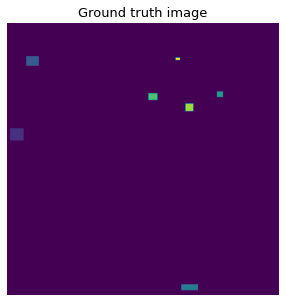

In [31]:
#creating the ground truth image
shape = hyperim.shape
groundtruth = np.zeros([shape[0],shape[1]])
groundtruth[387:432, 11:61] = 1.0  #grass
groundtruth[122:157, 71:117] = 2.0  #dark tree
groundtruth[961:982, 641:702] = 3.0 # ground with soil
groundtruth[252:272, 772:794] = 4.0 #asphalt road
groundtruth[258:283, 520:553] = 5.0 #black roof
groundtruth[296:324, 656:685] = 6.0 #green roof
groundtruth[127:136, 620:636] = 7.0 #red roof

#displaying the image
plt.subplots(1,1,figsize=(7,5))
plt.title(label = "Ground truth image", fontsize=13)
plt.imshow(groundtruth) 
plt.axis('off')
plt.show()

### Creating image with 1st 8 PCs present in the hyperspectral image. 
We were asked to run the GMLC on complete hyperspectral image and on stack image of 1st 8 PCs.

In [32]:
pc_0995 = pc.reduce(fraction=0.995)# select the PCs with 99.5% variance-
img_8PCs = pc_0995.transform(hyperim) # then transforming that PCs with 99.5% to image
print("Number of PC's selected:", img_8PCs.shape[2])

Number of PC's selected: 8


In [33]:
# For stopping the spectral information printing
import logging, sys
logging.disable(sys.maxsize)

Processing...  0.0Processing... 16.7Processing... 33.3Processing... 50.0Processing... 66.7Processing... 83.3Processing... 100.Processing...done   


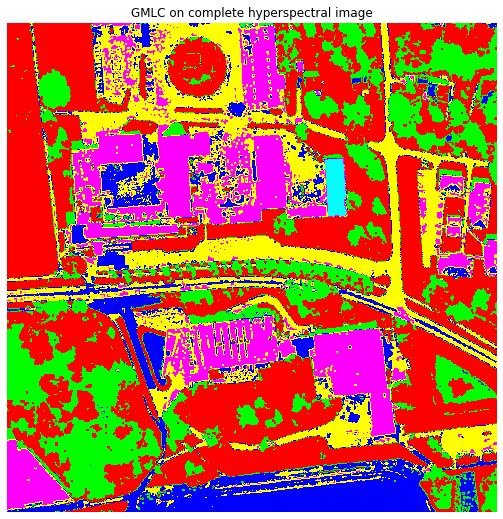

In [34]:
# Gaussian Maximum Likelihood Classification on the complete hyperspectral image
classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)

imshow(classes=clmap, figsize=(9,9))
plt.title("GMLC on complete hyperspectral image")
plt.axis('off')
plt.show()

Processing...  0.0Processing... 14.3Processing... 28.6Processing... 42.9Processing... 57.1Processing... 71.4Processing... 85.7Processing... 100.Processing...done   


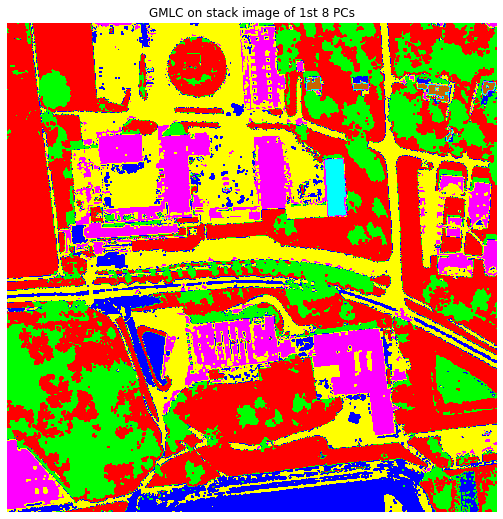

In [35]:
# Gaussian Maximum Likelihood Classification on the Image with 8 PCs
classes = create_training_classes(img_8PCs, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(img_8PCs)


imshow(classes=clmap, figsize=(9,9))
plt.title("GMLC on stack image of 1st 8 PCs")
plt.axis('off')
plt.show()

### Comment on the GMLC images:

**Similary between GMLC on complete hyperspectral image and 8PC image**
- Sucessfully identified the vegetation(grass, trees, water plants), roof tops, and roads present in the image. 
  - The grass has been represented in red color. 
  - The trees and water plants have been represented in green/lemon color. 
  - The dark roof tops have been represented in Magenta color. 
  - The green roof top has been represented in Cyan color.
  - The red roof top has been represented in Brown color.
  - The The grounds with soil have presented in blue color. 
  - All the pavements/concrete parking plots/pathways and asphalt roads have represented in yellow color. 
- **Problem:** Water in the middle of the pond has been identified as grass. Except that no misclassifications have been identified

**dissimilarity between GMLC on complete hyperspectral image and 8PC image**
- GMLC on the Complete spectral image is much more detailed in terms of soil detection compared to the 8PC. 

In [36]:
# #finding max and min pixel value of a image
# img = img_31PCs[:,:,5]
# smallest = np.amin(img)
# biggest = np.amax(img)
# print("smallest ", smallest )
# print("biggest", biggest)

In [37]:
# img = img_31PCs[:,:,5]
# plt.subplots(1,1,figsize=(10,8))
# plt. imshow(img, vmin=-0.001, vmax = 0.05)

6. Apply an edge detecting filter on the class of vegetation and overlay the ndvi-image you computed earlier. This will outline the vegetation areas in the image as shown in Fig. 6. (10p)

# Task6: Outlining the vegetation using edge detecting filters
For detecting the edges, I have used 4 filters
1. Prewitt
2. Sobel
3. Canny
4. Laplace


In [38]:
# display results for all filters WITHOUT vmin and vmax
def edge_operator(image, operator):
    # Setup
    shape = np.shape(image)
    if len(shape) == 3:#making sure it is a color/RGB image
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')
    
    # performing the filters
    filtered = None
    if operator == 1:
        filtered = filters.sobel(image)
    elif operator == 2:
        filtered = filters.prewitt(image) 
    elif operator == 3:
        filtered = feature.canny(image, sigma=3)        
    elif operator == 4:
        filtered = filters.laplace(image)
    else:
        return "you have given wrong operator"
        
    return filtered

sobel = edge_operator(ndvi_image_python[:,:], 1)
prewitt = edge_operator(ndvi_image_python[:,:], 2)
canny = edge_operator(ndvi_image_python[:,:], 3)
laplace = edge_operator(ndvi_image_python[:,:], 4)

In [39]:
# from PIL import Image
  
# # Opening the primary image (used in background)
# img1 = sobel_on_veg
  
# # Opening the secondary image (overlay image)
# img2 = sobel_on_NDVI
  
# # Pasting img2 image on top of img1 
# # starting at coordinates (0, 0)
# img1.paste(img2, (0,0), mask = img2)
  
# # Displaying the image
# img1.show()

In [40]:
# #finding max and min pixel value of a image
# img = filtered
# smallest = np.amin(img)
# biggest = np.amax(img)
# print("smallest ", smallest )
# print("biggest", biggest)

# plt. imshow(img)

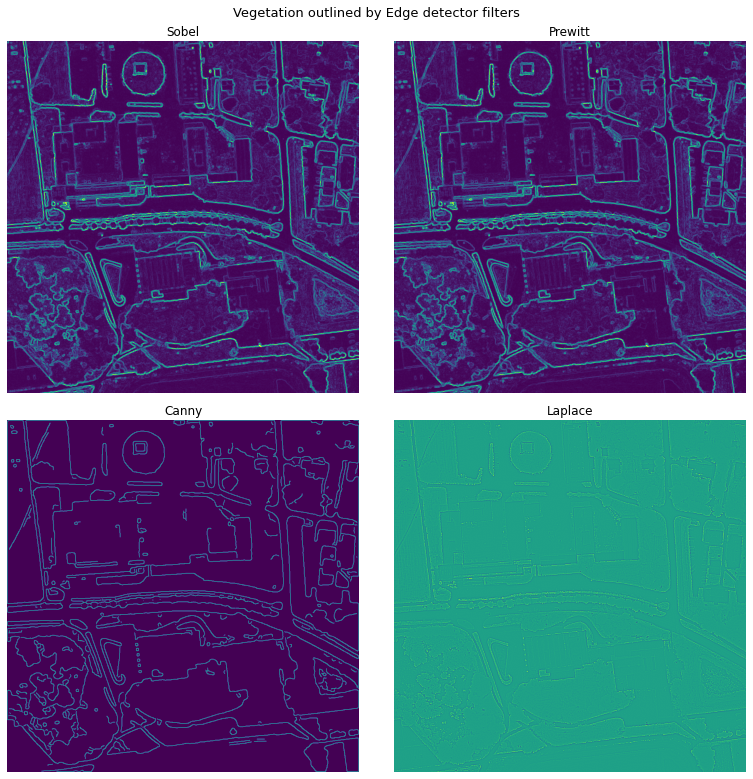

In [41]:
# display results for all filters WITH CUSTOM vmin and vmax
def show_results_for_all_with_custom_vmin_vmax():
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (11, 11))
    fig.suptitle("Vegetation outlined by Edge detector filters", fontsize = 13)    

    ax[0,0].imshow(sobel, vmin=0, vmax=0.44)
    ax[0,0].set_title('Sobel', fontsize = 12)

    ax[0, 1].imshow(prewitt, vmin=0, vmax=0.44)
    ax[0, 1].set_title(r'Prewitt', fontsize = 12)

    ax[1, 0].imshow(canny, vmin=0, vmax=1)
    ax[1, 0].set_title(r'Canny', fontsize = 12)

    ax[1, 1].imshow(laplace, vmin=-0.69, vmax=0.52)
    ax[1, 1].set_title(r'Laplace', fontsize = 12)

    for row in ax:
        for col in row:
            col.axis('off')

    fig.tight_layout()
    plt.show()
    
# Viewing all the filter results
show_results_for_all_with_custom_vmin_vmax()

### Comment on the vegetation outlining:
All the edge detectors filters except laplace have successfully outlined the vegetation.  Among these, Prewitt and Sobel had same styled outline and Canny had a different styled outline.

# Trial on Overlay

In [42]:
pc_0995 = pc.reduce(fraction=0.995)# select the PCs with 99.5% variance-
img_8PCs = pc_0995.transform(hyperim) # then transforming that PCs with 99.5% to image
print("Number of PC's selected:", img_8PCs.shape[2])

Number of PC's selected: 8


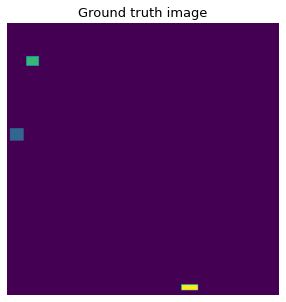

Processing...  0.0Processing... 33.3Processing... 66.7Processing... 100.Processing...done   


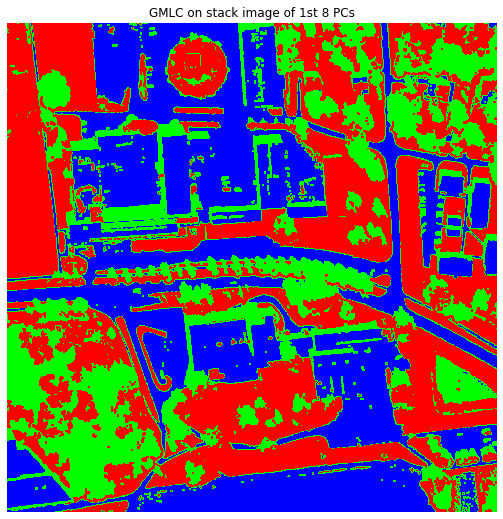

In [43]:
#creating the ground truth image
shape = hyperim.shape
groundtruth = np.zeros([shape[0],shape[1]])
groundtruth[387:432, 11:61] = 1.0  #grass
groundtruth[122:157, 71:117] = 2.0  #dark tree
groundtruth[961:982, 641:702] = 3.0 # ground with soil
# groundtruth[252:272, 772:794] = 4.0 #asphalt road
# groundtruth[258:283, 520:553] = 5.0 #black roof
# groundtruth[296:324, 656:685] = 6.0 #green roof
# groundtruth[127:136, 620:636] = 7.0 #red roof

#displaying the image
plt.subplots(1,1,figsize=(7,5))
plt.title(label = "Ground truth image", fontsize=13)
plt.imshow(groundtruth) 
plt.axis('off')
plt.show()


# Gaussian Maximum Likelihood Classification on the Image with 8 PCs
classes = create_training_classes(img_8PCs, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(img_8PCs)


imshow(classes=clmap, figsize=(9,9))
plt.title("GMLC on stack image of 1st 8 PCs")
plt.axis('off')
plt.show()

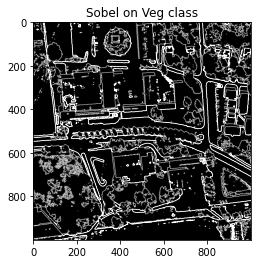

In [54]:
#Calling the different filters
ndvi_image_python = ndvi(hyperim[:,:],red_band, NIR_band)
sobel_on_veg_class = edge_operator(clmap, 1)
# canny_on_NDVI = edge_operator(ndvi_image_python, 3)
imshow(sobel_on_veg_class, vmin=0, vmax=0.44) 
plt.title("Sobel on Veg class")
plt.show()

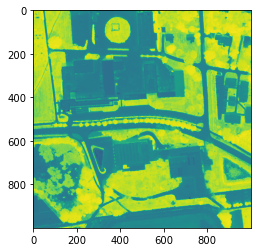

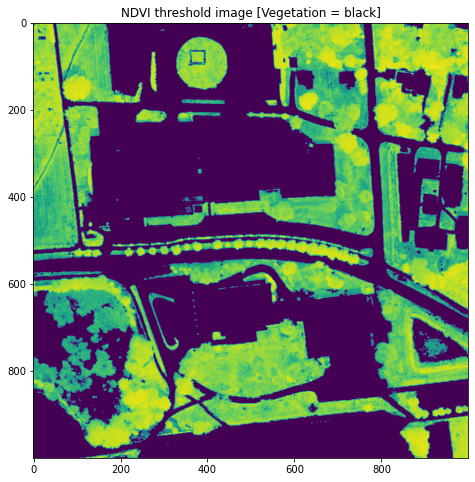

In [45]:
ndvi_image_python = ndvi(hyperim[:,:],red_band, NIR_band)
plt.imshow(ndvi_image_python)

#Thresholding NDVI
threshold = 0.4 
thesrhold_ndvi = ndvi_image_python.copy()
thesrhold_ndvi[thesrhold_ndvi < threshold] = 0


#Displaying the NDVI image
plt.subplots(1,1,figsize=(10,8))
plt.imshow(thesrhold_ndvi) 
plt.title("NDVI threshold image [Vegetation = black]")
plt.show()

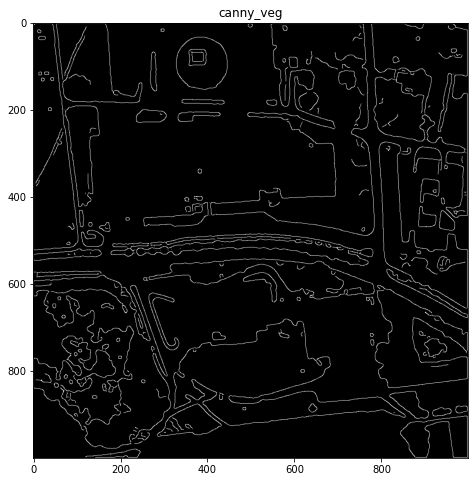

In [122]:
canny_veg = feature.canny(thesrhold_ndvi.copy(), sigma=3) *(1.0) 
#Displaying the NDVI image
plt.subplots(1,1,figsize=(10,8))
plt.imshow(canny_veg, cmap='gray') 
plt.title("canny_veg")
plt.show()

# gray_image = rgb2gray(canny_veg )
# plt.subplots(1,1,figsize=(10,8))
# plt.imshow(gray_image) 
# plt.title("gray_image")
# plt.show()


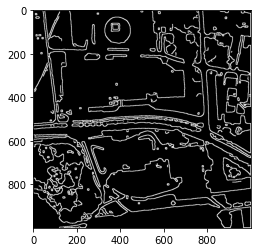

In [124]:
from skimage.morphology import dilation
from skimage.morphology import skeletonize, opening, square, disk, erosion, closing

sample = canny_veg.copy()
sample2 = dilation(sample, square(3))
plt.imshow(sample2, cmap='gray')

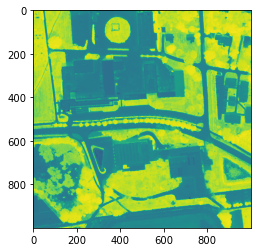

In [69]:
plt.imshow(ndvi_image_python)

In [47]:
# masked_canny = canny_veg+ndvi_image_python
# #Displaying the NDVI image
# plt.subplots(1,1,figsize=(10,8))
# plt.imshow(masked_canny) 
# plt.title("masked_canny")
# plt.show()

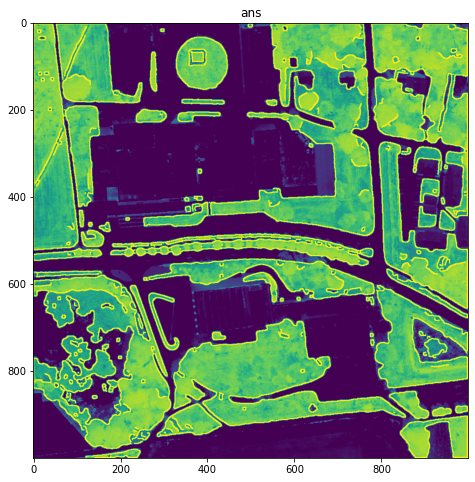

In [125]:
#Trying to overly---did not work
shape = np.shape(canny_veg)
ans = np.zeros([shape[0], shape[1]])
# print("before",ans)
for i in range(shape[0]):
    for j in range(shape[1]):
#         ans[i, j] =  max(float(canny_veg[i,j]), float(ndvi_image_python[i,j]))
        max_val = max(float(sample2[i,j]), float(ndvi_image_python[i,j]))
#         print("canny_veg", canny_veg[i,j],"ndvi",ndvi_image_python[i,j], "max_val", max_val)
        ans[i, j] = max_val
# print("after",ans)        
plt.subplots(1,1,figsize=(10,8))
plt.imshow(ans) 
plt.title("ans")
plt.show()

https://stackoverflow.com/questions/5073386/how-do-you-directly-overlay-a-scatter-plot-on-top-of-a-jpg-image-in-matplotlib

Code works, not overlay: https://www.geeksforgeeks.org/python-pil-paste-and-rotate-method/

https://note.nkmk.me/en/python-pillow-paste/

In [50]:
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio
# from contextlib import contextmanager


# def plot_over(img, extent=None, origin="upper", dpi=100):
#     h, w, d = img.shape
#     assert d == 3
#     if extent is None:
#         xmin, xmax, ymin, ymax = -0.5, w + 0.5, -0.5, h + 0.5
#     else:
#         xmin, xmax, ymin, ymax = extent
#     if origin == "upper":
#         ymin, ymax = ymax, ymin
#     elif origin != "lower":
#         raise ValueError("origin must be 'upper' or 'lower'")
#     fig = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
#     ax = plt.Axes(fig, (0, 0, 1, 1))
#     ax.set_axis_off()
#     ax.set_xlim(xmin, xmax)
#     ax.set_ylim(ymin, ymax)
#     fig.add_axes(ax)
#     fig.set_facecolor((0, 0, 0, 0))
#     yield ax
#     fig.canvas.draw()
#     plot = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8).reshape(h, w, 4)
#     plt.close(fig)
#     rgb = plot[ndvi_image_python, :3]
#     alpha = plot[ndvi_image_python, 3, None]
#     img[...] = ((255 - alpha) * img.astype(np.uint16) + alpha * rgb.astype(np.uint16)) // 255

# img_with_plot = sobel_on_veg.copy()
# with plot_over(img_with_plot) as ax:
#     ax.plot(ndvi_image_python)
#     # etc

In [53]:

# # Importing Image module from PIL package
# from PIL import Image
 
# # creating a image object (main image)
# im1 = Image.open(r"Figure_4.png")
 
# # creating a image object (image which is to be paste on main image)
# im2 = Image.open(r"Figure_3.png")
 
# # pasting im2 on im1
# Image.Image.paste(im1, im2, (0, 0))
 
# # to show specified image
# im1.show()

In [77]:
print(max(0.0,0.1416472675384062) )


0.1416472675384062
